## Import the required package

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import re
import seaborn as sns
from PIL import Image
import pandas as pd
import itertools
import json

## Load the EIS data

In [35]:
# For Robert's Data:
data = "rbnb3p8_Test_4_Char_GEIS_9_raw.json"
f = open(data)
data = json.load(f)

In [36]:
df = pd.DataFrame(data)
df

,GEIS
Ece,"[-0.268477, -0.269202, -0.269639, -0.26984, -0..."
Ece_bar,"[-2147483648.0, -536870912.0, 1073741824.0, -2..."
Ewe,"[1.58075, 1.59453, 1.59925, 1.60055, 1.6013, 1..."
Ewe_bar,"[0.00123485, 0.00122957, 0.00123855, 0.0009437..."
I,"[0.000702716, 0.000702849, 0.00070282, 0.00070..."
I_bar,"[6.62439e-05, 6.6714e-05, 6.79687e-05, 5.11851..."
Ice_bar,"[6.62384e-05, 6.67107e-05, 6.79665e-05, 5.1184..."
freq,"[100016.0, 79125.0, 62601.6, 49539.1, 39195.3,..."
meta,"[Tue Jan 4 14:24:10 2022, Sequence time = 118..."
phase_Zce,"[0.0493015, 0.00483781, -0.0222723, -0.0498514..."


In [10]:
# For Parisa's Data
data = pd.read_excel("Parisa_2022-01-28-MEA #3_02_PEIS_C01.xlsx")

In [11]:
new_col = ['freq/Hz', 'Re(Z)/Ohm',"=-@Im(Z)/@Ohm" , '|Z|/Ohm',"Phase(Z)/deg","time/s","<Ewe>/V","<I>/mA","Cs/µF", "Cp/µF","cycle number","I Range","|Ewe|/V","|I|/A","Ns","(Q-Qo)/mA.h","Re(Y)/Ohm-1","Im(Y)/Ohm-1","|Y|/Ohm-1","Phase(Y)/deg","dq/mA.h"]
data.columns = new_col
data[62:132]

,freq/Hz,Re(Z)/Ohm,=-@Im(Z)/@Ohm,|Z|/Ohm,Phase(Z)/deg,time/s,<Ewe>/V,<I>/mA,Cs/µF,Cp/µF,...,I Range,|Ewe|/V,|I|/A,Ns,(Q-Qo)/mA.h,Re(Y)/Ohm-1,Im(Y)/Ohm-1,|Y|/Ohm-1,Phase(Y)/deg,dq/mA.h
62,1.00002e+06,0.671438,-3.174957,3.24518,78.0591,2948.18,-3.00026,-374.248,-0.0501273,-0.0479814,...,7,6.42706e-05,1.9805e-05,0,-45259.4,0.0637572,-0.301482,0.308149,-78.0591,-45259.4
63,791679,2.5599,-0.638218,2.63826,13.9992,2948.63,-3.00078,-376.371,-0.314994,-0.0184334,...,7,4.01364e-05,1.52132e-05,0,-45259.5,0.36778,-0.0916925,0.379038,-13.9992,-0.0475503
64,626763,-0.195147,-1.190079,1.20597,99.3124,2949.09,-3.00092,-377.417,-0.213374,-0.207787,...,7,5.23888e-05,4.34411e-05,0,-45259.5,-0.13418,-0.818278,0.829206,-99.3124,-0.0476673
65,496196,-0.100336,-0.696363,0.703554,98.1991,2949.81,-3.00097,-378.382,-0.460608,-0.45124,...,7,0.000209579,0.000297886,0,-45259.6,-0.202704,-1.40683,1.42135,-98.1991,-0.0773206
66,392824,0.066372,-0.545445,0.549468,83.0621,2950.25,-3.00097,-378.765,-0.742799,-0.731961,...,7,0.000560614,0.00102028,0,-45259.6,0.219836,-1.80661,1.81994,-83.0621,-0.0462676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.254711,0.915332,-0.049881,0.91669,3.11924,3010.24,-3.00119,-378.933,-12526740,-37090.4,...,7,0.0106993,0.0116717,0,-45265.9,1.08926,-0.0593593,1.09088,-3.11924,-0.870825
128,0.201707,0.909568,-0.055304,0.911248,3.47945,3020.7,-3.00118,-379.127,-14267344,-52551.4,...,7,0.0107021,0.0117444,0,-45267,1.09537,-0.0666015,1.0974,-3.47945,-1.09952
129,0.159595,0.891954,-0.059271,0.893921,3.80177,3033.91,-3.00118,-379.169,-16825078,-73968.3,...,7,0.0107019,0.0119718,0,-45268.4,1.11621,-0.0741729,1.11867,-3.80177,-1.39035
130,0.126203,0.881463,-0.063935,0.883779,4.14859,3050.6,-3.00118,-379.065,-19724558,-103229,...,7,0.0107009,0.0121081,0,-45270.2,1.12854,-0.0818568,1.1315,-4.14859,-1.75847


## Plot the data

In [37]:
# For Robert's Data

abs_Ewe = df["GEIS"]["Ewe_bar"]
abs_I = df["GEIS"]["I_bar"]
Phase_Zwe = np.array(df["GEIS"]["phase_Zwe"])

abs_Z = np.divide(abs_Ewe, abs_I)
Re_Z = np.multiply(abs_Z, (np.cos(Phase_Zwe)))
Im_Z = -np.multiply(abs_Z , (np.sin(Phase_Zwe)))

reals = Re_Z
imags = Im_Z
frequencies = df["GEIS"]["freq"]
measurements = reals + imags*1j

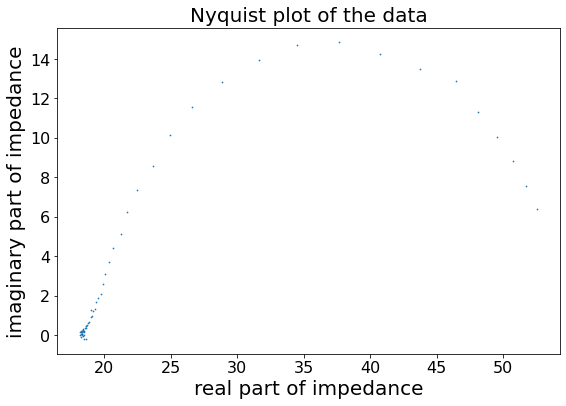

In [38]:
fig = plt.figure(figsize=(9, 6))
sub0 = fig.add_subplot(111)
plt.scatter(reals,imags,s=0.5) # note: np.cumsum also works
sub0.set_xlabel('real part of impedance', fontsize=20)
sub0.set_ylabel('imaginary part of impedance', fontsize=20)
sub0.set_title('Nyquist plot of the data', fontsize=20)
# sub0.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=16)
plt.show()

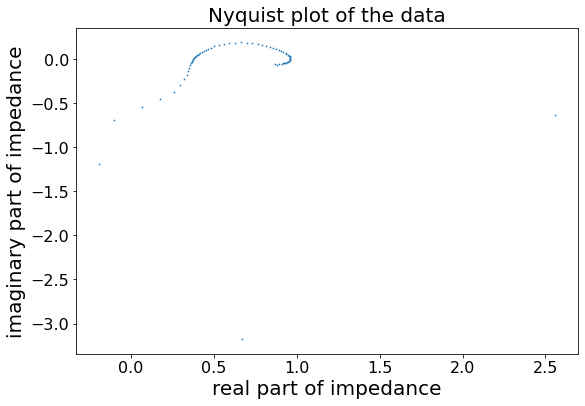

In [16]:
freq = data["freq/Hz"][62:132]
real = data["Re(Z)/Ohm"][62:132]
imag = data["=-@Im(Z)/@Ohm"][62:132]

fig = plt.figure(figsize=(9, 6))
sub0 = fig.add_subplot(111)
plt.scatter(real,imag,s=0.5) # note: np.cumsum also works
sub0.set_xlabel('real part of impedance', fontsize=20)
sub0.set_ylabel('imaginary part of impedance', fontsize=20)
sub0.set_title('Nyquist plot of the data', fontsize=20)
# sub0.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=16)
plt.show()

## Pre-processing

## KK validation

## Call Julia Program

In [27]:
from julia import Julia
jl = Julia(runtime=r"D:\Julia-1.7.2\bin\julia.exe")
n = jl.include('testtest.jl')

## Load the results

In [12]:
# load the circuits
file_path = "Test4_7_0.9.csv"
df_circuits = pd.read_csv(file_path)

In [13]:
df_circuits

,Circuit,Parameters
0,"[P1-R2,[P3,L4-R5]]","(P1w = 321.09004151255124, P1n = 0.89574790651..."
1,"[R1-L2,P3-R4-[R5,[C6,R7]]]","(R1 = 53.038823406509806, L2 = 2.2115157576107..."
2,"[P1,R2]-R3","(P1w = 116.66324180747166, P1n = 0.84285294911..."
3,"[P1,R2]-R3","(P1w = 116.66324181902428, P1n = 0.84285294925..."
4,"[R1-[C2,P3],P4]","(R1 = 29.29147409690113, C2 = 3.54882817899330..."
...,...,...
95,"[L1,R2]-R3-[R4,P5]","(L1 = 1.907930339239415e-7, R2 = 3.31051477277..."
96,"P1-[R2,C3]-R4","(P1w = 8.041438172933333, P1n = 0.327841482410..."
97,"[P1-R2,R3-C4-P5]","(P1w = 2.4963539464965234, P1n = 0.41429578937..."
98,"[R1,P2]-[R3,C4]-R5","(R1 = 17.627399586266066, P2w = 23.82615887617..."


In [14]:
# define some regular expression pattern to separate each kind of elements
resistor_p = re.compile(r'[R][0-9][a-z]? = [0-9]*\.[0-9]*')
capacitor_p = re.compile(r'[C][0-9][a-z]? = [0-9]*\.[0-9]*')
inductor_p = re.compile(r'[L][0-9][a-z]? = [0-9]*\.[0-9]*')
CPE_p = re.compile(r'[P][0-9][a-z]? = [0-9]*\.[0-9]*')

# 
numb_p = re.compile(r'[0-9]*\.[0-9]{4}')
# initialize some lists to store the values of each kind of elements
resistors_list = []
capacitors_list = []
inductors_list = []
CPEs_list = []

for i in range(len(df_circuits['Parameters'])):
    resistors = resistor_p.findall(df_circuits['Parameters'][i])
    capacitors = capacitor_p.findall(df_circuits['Parameters'][i])
    inductors = inductor_p.findall(df_circuits['Parameters'][i])
    CPEs = CPE_p.findall(df_circuits['Parameters'][i])
    
    resistors_list.append(resistors)
    capacitors_list.append(capacitors)
    inductors_list.append(inductors)
    CPEs_list.append(CPEs)
    
df_circuits['Resistors'] = resistors_list
df_circuits['Capacitors'] = capacitors_list
df_circuits['Inductors'] = inductors_list
df_circuits['CPEs'] = CPEs_list


In [15]:
df_circuits

,Circuit,Parameters,Resistors,Capacitors,Inductors,CPEs
0,"[P1-R2,[P3,L4-R5]]","(P1w = 321.09004151255124, P1n = 0.89574790651...","[R2 = 30.67069239794822, R5 = 427.5926082372904]",[],[L4 = 0.0016115677684073533],"[P1w = 321.09004151255124, P1n = 0.89574790651..."
1,"[R1-L2,P3-R4-[R5,[C6,R7]]]","(R1 = 53.038823406509806, L2 = 2.2115157576107...","[R1 = 53.038823406509806, R4 = 27.488147152910...",[C6 = 0.0035413501982459023],[L2 = 2.211515757610746],"[P3w = 40.90169733369939, P3n = 0.517278058967..."
2,"[P1,R2]-R3","(P1w = 116.66324180747166, P1n = 0.84285294911...","[R2 = 36.93934607317806, R3 = 18.30192000322114]",[],[],"[P1w = 116.66324180747166, P1n = 0.84285294911..."
3,"[P1,R2]-R3","(P1w = 116.66324181902428, P1n = 0.84285294925...","[R2 = 36.939346066345564, R3 = 18.301920001479...",[],[],"[P1w = 116.66324181902428, P1n = 0.84285294925..."
4,"[R1-[C2,P3],P4]","(R1 = 29.29147409690113, C2 = 3.54882817899330...",[R1 = 29.29147409690113],[C2 = 3.548828178993303],[],"[P3w = 295.4727592713146, P3n = 0.875279918673..."
...,...,...,...,...,...,...
95,"[L1,R2]-R3-[R4,P5]","(L1 = 1.907930339239415e-7, R2 = 3.31051477277...","[R2 = 3.310514772777255, R3 = 18.3015208023388...",[],[L1 = 1.907930339239415],"[P5w = 116.65555291334444, P5n = 0.84280718053..."
96,"P1-[R2,C3]-R4","(P1w = 8.041438172933333, P1n = 0.327841482410...","[R2 = 25.389122709325093, R4 = 17.88050128030263]",[C3 = 0.008202065058669139],[],"[P1w = 8.041438172933333, P1n = 0.327841482410..."
97,"[P1-R2,R3-C4-P5]","(P1w = 2.4963539464965234, P1n = 0.41429578937...","[R2 = 50.38609542027334, R3 = 28.147789153558445]",[C4 = 0.0030456451505838627],[],"[P1w = 2.4963539464965234, P1n = 0.41429578937..."
98,"[R1,P2]-[R3,C4]-R5","(R1 = 17.627399586266066, P2w = 23.82615887617...","[R1 = 17.627399586266066, R3 = 22.282995069686...",[C4 = 0.009999999999999981],[],"[P2w = 23.826158876172883, P2n = 0.54888310785..."


###  Filtering results with resistance

In [167]:
deleting_list = []
for i in range(len(df_circuits['Resistors'])):
    resistor_values_list = []
    for j in range(len(df_circuits['Resistors'][i])):
        resistor_values_list.append(float(numb_p.findall(df_circuits['Resistors'][i][j])[0]))
    resistor_values_array = np.array([resistor_values_list])
    resistor_values_array_T = resistor_values_array.T
    if (resistor_values_array/resistor_values_array_T >= 10).any() or (resistor_values_array/resistor_values_array_T <= 0.1).any():
        df_circuits.drop([i],inplace = True)
        
df_circuits.reset_index(drop=True,inplace=True)
        
    

In [168]:
df_circuits

,Circuit,Parameters,Resistors,Capacitors,Inductors,CPEs
0,"[P1,R2]-R3","(P1w = 116.66324180747166, P1n = 0.84285294911...","[R2 = 36.93934607317806, R3 = 18.30192000322114]",[],[],"[P1w = 116.66324180747166, P1n = 0.84285294911..."
1,"[P1,R2]-R3","(P1w = 116.66324181902428, P1n = 0.84285294925...","[R2 = 36.939346066345564, R3 = 18.301920001479...",[],[],"[P1w = 116.66324181902428, P1n = 0.84285294925..."
2,"[R1-[C2,P3],P4]","(R1 = 29.29147409690113, C2 = 3.54882817899330...",[R1 = 29.29147409690113],[C2 = 3.548828178993303],[],"[P3w = 295.4727592713146, P3n = 0.875279918673..."
3,"P1-[R2,C3]-C4","(P1w = 20.255829782847957, P1n = 0.00925545620...",[R2 = 15.293129032988995],"[C3 = 0.005357724945165028, C4 = 0.01]",[],"[P1w = 20.255829782847957, P1n = 0.00925545620..."
4,"[R1,P2]-P3-R4-[C5,L6]","(R1 = 30.673174378138622, P2w = 116.9486781724...","[R1 = 30.673174378138622, R4 = 17.928235208434...",[C5 = 0.009999999999999603],[L6 = 1.270261173762957],"[P2w = 116.94867817246204, P2n = 0.91917770845..."
...,...,...,...,...,...,...
82,"[R1-[R2,C3],P4-R5]","(R1 = 26.044938631888535, R2 = 30.026130719051...","[R1 = 26.044938631888535, R2 = 30.026130719051...",[C3 = 0.006001382491301986],[],"[P4w = 407.92821162910616, P4n = 0.61197924920..."
83,"P1-[R2,C3]-R4","(P1w = 8.041438172933333, P1n = 0.327841482410...","[R2 = 25.389122709325093, R4 = 17.88050128030263]",[C3 = 0.008202065058669139],[],"[P1w = 8.041438172933333, P1n = 0.327841482410..."
84,"[P1-R2,R3-C4-P5]","(P1w = 2.4963539464965234, P1n = 0.41429578937...","[R2 = 50.38609542027334, R3 = 28.147789153558445]",[C4 = 0.0030456451505838627],[],"[P1w = 2.4963539464965234, P1n = 0.41429578937..."
85,"[R1,P2]-[R3,C4]-R5","(R1 = 17.627399586266066, P2w = 23.82615887617...","[R1 = 17.627399586266066, R3 = 22.282995069686...",[C4 = 0.009999999999999981],[],"[P2w = 23.826158876172883, P2n = 0.54888310785..."


### Filtering results with capacitance

In [16]:
# delete the circuits with Capacitor
for i in range(len(df_circuits['Capacitors'])):
    if df_circuits['Capacitors'][i] != []:
        df_circuits.drop([i],inplace = True)

df_circuits.reset_index(drop=True,inplace=True)


In [17]:
df_circuits

,Circuit,Parameters,Resistors,Capacitors,Inductors,CPEs
0,"[P1-R2,[P3,L4-R5]]","(P1w = 321.09004151255124, P1n = 0.89574790651...","[R2 = 30.67069239794822, R5 = 427.5926082372904]",[],[L4 = 0.0016115677684073533],"[P1w = 321.09004151255124, P1n = 0.89574790651..."
1,"[P1,R2]-R3","(P1w = 116.66324180747166, P1n = 0.84285294911...","[R2 = 36.93934607317806, R3 = 18.30192000322114]",[],[],"[P1w = 116.66324180747166, P1n = 0.84285294911..."
2,"[P1,R2]-R3","(P1w = 116.66324181902428, P1n = 0.84285294925...","[R2 = 36.939346066345564, R3 = 18.301920001479...",[],[],"[P1w = 116.66324181902428, P1n = 0.84285294925..."
3,"[R1-L2,P3-R4]","(R1 = 55.25826114584234, L2 = 1.55218173007144...","[R1 = 55.25826114584234, R4 = 18.20599681139756]",[],[L2 = 1.5521817300714484],"[P3w = 234.00995438684996, P3n = 0.84500072432..."
4,"P1-[R2,P3]-R4","(P1w = 4.33711736911608, P1n = 0.2749958730991...","[R2 = 30.66719342634599, R4 = 17.926127593712536]",[],[],"[P1w = 4.33711736911608, P1n = 0.2749958730991..."
5,"[R1-[L2,P3],P4-R5]","(R1 = 55.247578469841486, L2 = 7.7575410811456...","[R1 = 55.247578469841486, R5 = 27.360986243324...",[],[L2 = 7.757541081145631],"[P3w = 174419.91044260038, P3n = 0.94257991172..."
6,"[R1,P2]-R3","(R1 = 36.93934606753384, P2w = 116.66324172260...","[R1 = 36.93934606753384, R3 = 18.301920005161126]",[],[],"[P2w = 116.66324172260413, P2n = 0.84285294928..."
7,"[R1,[R2,[P3-[R4,R5],R6]]]","(R1 = 7.389998891743529e8, R2 = 55.24127340545...","[R1 = 7.389998891743529, R2 = 55.2412734054554...",[],[],"[P3w = 260.905288147883, P3n = 0.8428529496220..."
8,"[R1,[R2,P3]-P4]-R5","(R1 = 35.954502150427324, R2 = 1.0499147936127...","[R1 = 35.954502150427324, R2 = 1.0499147936127...",[],[],"[P3w = 59.95169789125724, P3n = 0.675230216696..."
9,"[R1,P2-R3]","(R1 = 55.24126609941385, P2w = 260.90528713839...","[R1 = 55.24126609941385, R3 = 27.36976530375484]",[],[],"[P2w = 260.9052871383904, P2n = 0.842852948498..."


### Filtering the data with inductors

In [18]:
# delete the circuits with Capacitor
for i in range(len(df_circuits['Inductors'])):
    if df_circuits['Inductors'][i] != []:
        df_circuits.drop([i],inplace = True)

df_circuits.reset_index(drop=True,inplace=True)


In [19]:
df_circuits

,Circuit,Parameters,Resistors,Capacitors,Inductors,CPEs
0,"[P1,R2]-R3","(P1w = 116.66324180747166, P1n = 0.84285294911...","[R2 = 36.93934607317806, R3 = 18.30192000322114]",[],[],"[P1w = 116.66324180747166, P1n = 0.84285294911..."
1,"[P1,R2]-R3","(P1w = 116.66324181902428, P1n = 0.84285294925...","[R2 = 36.939346066345564, R3 = 18.301920001479...",[],[],"[P1w = 116.66324181902428, P1n = 0.84285294925..."
2,"P1-[R2,P3]-R4","(P1w = 4.33711736911608, P1n = 0.2749958730991...","[R2 = 30.66719342634599, R4 = 17.926127593712536]",[],[],"[P1w = 4.33711736911608, P1n = 0.2749958730991..."
3,"[R1,P2]-R3","(R1 = 36.93934606753384, P2w = 116.66324172260...","[R1 = 36.93934606753384, R3 = 18.301920005161126]",[],[],"[P2w = 116.66324172260413, P2n = 0.84285294928..."
4,"[R1,[R2,[P3-[R4,R5],R6]]]","(R1 = 7.389998891743529e8, R2 = 55.24127340545...","[R1 = 7.389998891743529, R2 = 55.2412734054554...",[],[],"[P3w = 260.905288147883, P3n = 0.8428529496220..."
5,"[R1,[R2,P3]-P4]-R5","(R1 = 35.954502150427324, R2 = 1.0499147936127...","[R1 = 35.954502150427324, R2 = 1.0499147936127...",[],[],"[P3w = 59.95169789125724, P3n = 0.675230216696..."
6,"[R1,P2-R3]","(R1 = 55.24126609941385, P2w = 260.90528713839...","[R1 = 55.24126609941385, R3 = 27.36976530375484]",[],[],"[P2w = 260.9052871383904, P2n = 0.842852948498..."
7,"[R1,P2]-R3","(R1 = 36.93934604829248, P2w = 116.66324168931...","[R1 = 36.93934604829248, R3 = 18.301920007027295]",[],[],"[P2w = 116.66324168931236, P2n = 0.84285294890..."
8,"R1-[P2,R3]","(R1 = 18.301920003005616, P2w = 116.6632415754...","[R1 = 18.301920003005616, R3 = 36.93934607374494]",[],[],"[P2w = 116.66324157542962, P2n = 0.84285294877..."
9,"[[P1,R2]-R3,[P4,R5]]","(P1w = 295.472742045751, P1n = 0.8752799186377...","[R2 = 9.999984077565509, R3 = 29.2914732659942...",[],[],"[P1w = 295.472742045751, P1n = 0.8752799186377..."


## Generating mathematical expression

In [20]:
def generate_mathematical_expression(input = df_circuits):
    
    # define two kinds of pattern to find all elements in the circuit
    test_pattern = re.compile(r'([CLRP])([0-9])+')
    test_pattern_2 = re.compile(r'[CLRP][0-9]')
    
    # create a list to store the mathematical expressions
    new_circuits = []
    
    for i in range(len(input['Circuit'])):
        circuit = input['Circuit'][i]
        for j,k in zip(["-","[",",","]"],["+","((",")^-1+(",")^-1)^-1"]):
            circuit = circuit.replace(j,k)
        test_results = test_pattern.findall(circuit)
        test_results_2 = test_pattern_2.findall(circuit)
        
        for m in range(len(test_results)):
            if test_results[m][0] == 'R':
                circuit = circuit.replace(test_results_2[m],"X")
            elif test_results[m][0] == 'C':
                circuit = circuit.replace(test_results_2[m],"(1/(2*1j*π*F*X))")
            elif test_results[m][0] == 'L':
                circuit = circuit.replace(test_results_2[m],"(2*1j*π*F*X)")
            elif test_results[m][0] == 'P':
                circuit = circuit.replace(test_results_2[m],"X*(2*π*F)**(-Y)*(cos((π*Y)*0.5)-sin((π*Y)*0.5)*1j)")
        
        new_temp_circuit = []
        counter = 0
        
        for n in range(len(circuit)):
            if circuit[n] == 'X':
                new_temp_circuit.append(f"X[{str(counter)}]")
                counter += 1
            elif circuit[n] == 'Y':
                new_temp_circuit.append(f"X[{str(counter)}]")
            else:
                new_temp_circuit.append(circuit[n])
        new_circuit = ''.join(new_temp_circuit)
        new_circuits.append(new_circuit)
        
    input['Mathematical expressions'] = new_circuits
    
    return input


In [21]:
df_circuits = generate_mathematical_expression(input = df_circuits)
df_circuits

,Circuit,Parameters,Resistors,Capacitors,Inductors,CPEs,Mathematical expressions
0,"[P1,R2]-R3","(P1w = 116.66324180747166, P1n = 0.84285294911...","[R2 = 36.93934607317806, R3 = 18.30192000322114]",[],[],"[P1w = 116.66324180747166, P1n = 0.84285294911...",((X[0]*(2*π*F)**(-X[1])*(cos((π*X[1])*0.5)-sin...
1,"[P1,R2]-R3","(P1w = 116.66324181902428, P1n = 0.84285294925...","[R2 = 36.939346066345564, R3 = 18.301920001479...",[],[],"[P1w = 116.66324181902428, P1n = 0.84285294925...",((X[0]*(2*π*F)**(-X[1])*(cos((π*X[1])*0.5)-sin...
2,"P1-[R2,P3]-R4","(P1w = 4.33711736911608, P1n = 0.2749958730991...","[R2 = 30.66719342634599, R4 = 17.926127593712536]",[],[],"[P1w = 4.33711736911608, P1n = 0.2749958730991...",X[0]*(2*π*F)**(-X[1])*(cos((π*X[1])*0.5)-sin((...
3,"[R1,P2]-R3","(R1 = 36.93934606753384, P2w = 116.66324172260...","[R1 = 36.93934606753384, R3 = 18.301920005161126]",[],[],"[P2w = 116.66324172260413, P2n = 0.84285294928...",((X[0])^-1+(X[1]*(2*π*F)**(-X[2])*(cos((π*X[2]...
4,"[R1,[R2,[P3-[R4,R5],R6]]]","(R1 = 7.389998891743529e8, R2 = 55.24127340545...","[R1 = 7.389998891743529, R2 = 55.2412734054554...",[],[],"[P3w = 260.905288147883, P3n = 0.8428529496220...",((X[0])^-1+(((X[1])^-1+(((X[2]*(2*π*F)**(-X[3]...
5,"[R1,[R2,P3]-P4]-R5","(R1 = 35.954502150427324, R2 = 1.0499147936127...","[R1 = 35.954502150427324, R2 = 1.0499147936127...",[],[],"[P3w = 59.95169789125724, P3n = 0.675230216696...",((X[0])^-1+(((X[1])^-1+(X[2]*(2*π*F)**(-X[3])*...
6,"[R1,P2-R3]","(R1 = 55.24126609941385, P2w = 260.90528713839...","[R1 = 55.24126609941385, R3 = 27.36976530375484]",[],[],"[P2w = 260.9052871383904, P2n = 0.842852948498...",((X[0])^-1+(X[1]*(2*π*F)**(-X[2])*(cos((π*X[2]...
7,"[R1,P2]-R3","(R1 = 36.93934604829248, P2w = 116.66324168931...","[R1 = 36.93934604829248, R3 = 18.301920007027295]",[],[],"[P2w = 116.66324168931236, P2n = 0.84285294890...",((X[0])^-1+(X[1]*(2*π*F)**(-X[2])*(cos((π*X[2]...
8,"R1-[P2,R3]","(R1 = 18.301920003005616, P2w = 116.6632415754...","[R1 = 18.301920003005616, R3 = 36.93934607374494]",[],[],"[P2w = 116.66324157542962, P2n = 0.84285294877...",X[0]+((X[1]*(2*π*F)**(-X[2])*(cos((π*X[2])*0.5...
9,"[[P1,R2]-R3,[P4,R5]]","(P1w = 295.472742045751, P1n = 0.8752799186377...","[R2 = 9.999984077565509, R3 = 29.2914732659942...",[],[],"[P1w = 295.472742045751, P1n = 0.8752799186377...",((((X[0]*(2*π*F)**(-X[1])*(cos((π*X[1])*0.5)-s...


## Find the identical circuits and combine them

In [22]:
# convert the circuit string to nparray
def s_to_a_convert(input_circuit):
    circuit = re.sub(r'[0-9]+', '', input_circuit)
    pat = re.compile(r'[RCLP\[\]\-,]')
    str = pat.findall(circuit)
    circuit_array = np.zeros((1,len(str)))
    for i in range(len(str)):
        # encoding rules: R=1，C=2，L=3，P=4，[=5,]=6,"-"=7,","=8
        if str[i] == "R":
            circuit_array[0,i] = 1
        elif str[i] == "C":
            circuit_array[0,i] = 2
        elif str[i] == "L":
            circuit_array[0,i] = 3
        elif str[i] == "P":
            circuit_array[0,i] = 4
        elif str[i] == "[":
            circuit_array[0,i] = 5
        elif str[i] == "]":
            circuit_array[0,i] = 6
        elif str[i] == "-":
            circuit_array[0,i] = 7
        elif str[i] == ",":
            circuit_array[0,i] = 8
    return circuit_array

In [23]:
# define a function to count components numbers
def count_components(circuit,symbols = True):
    
    # define the pattern for each components (p denotes pattern)
    r_p = re.compile(r'[R]')
    c_p = re.compile(r'[C]')
    l_p = re.compile(r'[L]')
    p_p = re.compile(r'[P]')
    if symbols:
        b_p = re.compile(r'[\[\]]')
        d_p = re.compile(r'[\-]')
        comma_p = re.compile(r'[,]')
    
    # find the individual components (n denotes number)
    r_n = r_p.findall(circuit) 
    c_n = c_p.findall(circuit)
    l_n = l_p.findall(circuit)
    p_n = p_p.findall(circuit)
    if symbols:
        b_n = b_p.findall(circuit)
        d_n = d_p.findall(circuit)
        comma_n = comma_p.findall(circuit)
    
    # create array to store the numbers of components
    if symbols:
        array_components_numbers = np.zeros((1,7))
    else:
        array_components_numbers = np.zeros((1,4))
        
    # store the numbers of components into array
    array_components_numbers[0,0] = len(r_n)
    array_components_numbers[0,1] = len(c_n)
    array_components_numbers[0,2] = len(l_n)
    array_components_numbers[0,3] = len(p_n)
    if symbols:
        array_components_numbers[0,4] = len(b_n) # ÷2代表有几个并联结构
        array_components_numbers[0,5] = len(d_n)
        array_components_numbers[0,6] = len(comma_n) # +并联结构数代表并联支路总数
        
    return array_components_numbers

In [24]:
# detect the number of parallel structures and their levels(one group of [] denote one parallel structure)
# find all [ and ]
def parallel_structure_identifior(input_circuit,circuit_array):
    b_p = re.compile(r'[\[\]]')
    b_n = b_p.findall(input_circuit)
    parallel_number = len(b_n)/2
    
    pat_all_components = re.compile(r'[RCLP\[\]\-,]')
    circuit_str = pat_all_components.findall(input_circuit)
    
    #  identify the levels of each parallel structure
    if parallel_number == 0:
        separate_parallel_counter = 0
    else:
        # initialize the counter of parallel structurs and their levels
        separate_parallel_counter = 1
        lvl_counter = 1
        # initialize a list to store the levels of each parallel structure
        lvl_counter_list = []
        for i in range(1,len(b_n)):
            if b_n[i-1] == b_n[i] == "]":
                lvl_counter += 1
            if b_n[i-1] == "]" and b_n[i] == "[":
                separate_parallel_counter += 1
                lvl_counter_list.append(lvl_counter)
                lvl_counter = 1
        lvl_counter_list.append(lvl_counter)

    # the sum of lvl_counter_list should equal to parallel_number 

    # separate and count the components numbers each parallel structure
    l_s_position = np.where(circuit_array==5)[1]
    r_s_position = np.where(circuit_array==6)[1]  
    
    segments = []
    counter = 0
    for seg in range(separate_parallel_counter):
        lvl = lvl_counter_list[seg]
        segment = circuit_str[l_s_position[counter]:r_s_position[counter+lvl-1]+1]
        segments.append(segment)
        if lvl > 1:
            for i in range(lvl-1):
                sub_segment = circuit_str[l_s_position[counter+i+1]:r_s_position[counter+lvl-1-i-1]+1]
                segments.append(sub_segment)
        counter = counter + lvl 

    # combine these elements of segments as a string
    segments_str =[]
    for i in range(len(segments)):
        segment_str = ''.join(segments[i])
        segments_str.append(segment_str)
    #print(segments_str)
    
    # initialize an array to store the components numbers of each segment
    segments_components_array = np.zeros([int(parallel_number),7])
    for i in range(len(segments)):
        component_numbers = count_components(circuit=segments_str[i],symbols = True)
        segments_components_array[i,:] = component_numbers
    
    # sort the segments for further comparison
    idex = np.lexsort([segments_components_array[:,0],
                       segments_components_array[:,1],
                       segments_components_array[:,2],
                       segments_components_array[:,3],                      
                       segments_components_array[:,4],                      
                       segments_components_array[:,5],
                       segments_components_array[:,6]])
    segments_components_array = segments_components_array[idex,:]
    #print(segments_components_array)
    
    return segments_components_array,lvl_counter_list

In [25]:
# define a function to detect similar expressions for the same circuit
def identifior(input_circuits,circuits_characteristics):
    # input_circuits是输入的电路，circuits_characteristics是关于电路特征的字典
    # identifior用于识别一致电路的组合
    # return的也要介绍
    equal_lists = []
    equal_lists_seq = []
    for i in range(len(input_circuits)):
        equal_list = []
        equal_list_seq = []
        for j in range(len(input_circuits)):
            if (circuits_characteristics[input_circuits[i]]['num_components'] == circuits_characteristics[input_circuits[j]]['num_components']).all():
                if (circuits_characteristics[input_circuits[i]]['parallel_structures'] == circuits_characteristics[input_circuits[j]]['parallel_structures']).all():
                    equal_list.append(input_circuits[j])
                    equal_list_seq.append(j)
        equal_lists.append(equal_list)
        equal_lists_seq.append(equal_list_seq)
    
    return equal_lists, equal_lists_seq

In [26]:
# define a function to filter same "similar sequence list"
def filter(input):
    input.sort()
    equal_list_filtered = list(input for input,_ in itertools.groupby(input))
    return equal_list_filtered

In [27]:
def circuit_expression_combine(df_circuits):
    # load the EIS_EECMs_data
    # df_circuits = pd.read_csv(inpath)
    
    # initialize a dictionary to store the characteristics of each circuit
    circuits_dict = {}
    
    for circuit in range(len(df_circuits['Circuit'])):
        #print(circuit)
        
        # combine similar results
        input_circuit = df_circuits['Circuit'][circuit]
        #print(input_circuit)
        
        # delete the number contained in the circuits
        input_circuit = re.sub(r'[0-9]+', '', input_circuit)
        pat_all_components = re.compile(r'[RCLP\[\]\-,]')
        circuit_str = pat_all_components.findall(input_circuit)
        
        # convert the circuit string to array
        circuit_array = s_to_a_convert(input_circuit)
        
        # calculate the numbers of each component in the string
        num_components = count_components(circuit = input_circuit)
        
        # calculate the numbers of each components in each parallel structure in the string
        parallel_structures,lvl_counter_list = parallel_structure_identifior(input_circuit=input_circuit,circuit_array=circuit_array)
        
        # store these characteristics as a dictionary
        circuits_dict[df_circuits['Circuit'][circuit]] = {}
        circuits_dict[df_circuits['Circuit'][circuit]]["num_components"] = num_components
        circuits_dict[df_circuits['Circuit'][circuit]]["parallel_structures"] = parallel_structures
        
    # find the similar expression for the same circuits and record their index
    similar_lists = identifior(input_circuits = df_circuits['Circuit'],circuits_characteristics=circuits_dict)
    similar_expression = filter(similar_lists[0])
    similar_expression_index = filter(similar_lists[1])
    
    #print(similar_expression)
    #print(similar_expression_index)
    
    return similar_expression, similar_expression_index


## Before combination, separate the components values

In [28]:
def component_values(input=df_circuits['Parameters']):
    # delete the ( and ) in the string
    delete_p = re.compile(r'[^()]')
    
    # store the values of each component in 4 digits
    digit_p = re.compile(r'\-?[0-9]+\.[0-9]+')
    
    # store the names of each component
    name_p = re.compile(r'[A-Z][1-9][a-z]? = ')
    
    # create lists to store these data
    values_lists = []
    component_values_lists =[]
    names_lists =[]
    
    for i in range(len(input)):
        # separate the values of each component and store them with their name together
        # component_values_list = delete_p.findall(input[0])
        # component_values_list = ''.join(component_values_list)
        # component_values_list = component_values_list.split(',')
        # component_values_lists.append(component_values_list)
        
        # store the values of each component
        values_list = digit_p.findall(input[i]) 
        for j in range(len(values_list)):
            values_list[j] = float(values_list[j])
            values_list[j] = ("%.4f"%values_list[j])
            values_list[j] = float(values_list[j])
        values_lists.append(values_list)
        
        # store the names of each component
        names_list = name_p.findall(input[i])
        names_lists.append(names_list)
        
        # combine the names with values
        component_values_list=[]
        for k in range(len(values_list)):
            seq = [names_list[k],str(values_list[k])]
            component_values_list.append(''.join(seq))
        component_values_lists.append(component_values_list)
    
    return component_values_lists, values_lists, names_lists

In [29]:
#这里用函数定义的方式去写
combined_expressions = []
combined_values = []
mathematical_expressions = []

similar_expression, similar_expression_index = circuit_expression_combine(df_circuits)
# 这个函数的df_circuit改一下
component_values_lists, values_lists, names_lists= component_values(input=df_circuits['Parameters'])
# calculate the numbers of each component in the string
#num_components = count_components(circuit = input_circuit)




for i in range(len(similar_expression_index)):
    combined_expressions.append(df_circuits['Circuit'][similar_expression_index[i][0]])
    combined_value = []
    for j in range(len(similar_expression_index[i])):
        if j == 0:
            combined_value.append(component_values_lists[similar_expression_index[i][j]])
        else:
            if sorted(values_lists[similar_expression_index[i][j]]) != sorted(values_lists[similar_expression_index[i][j-1]]):
                combined_value.append(component_values_lists[similar_expression_index[i][j]])
    
    if len(combined_value) > 1:
        # calculate the statistical information about each component
        combined_component_value_list = []
        for k in range(len(combined_value)):
            combined_value[k] = sorted(combined_value[k])
            digit_p = re.compile(r'\-?[0-9]+\.[0-9]+')
            combined_component_value = digit_p.findall(','.join(combined_value[k]))
            for m in range(len(combined_component_value)):
                combined_component_value[m] = float(combined_component_value[m])
            combined_component_value_list.append(combined_component_value)
        combined_component_value_array = np.array(combined_component_value_list)
        
        name_p = re.compile(r'[A-Z][1-9][a-z]? = ')
        combined_name = name_p.findall(','.join(combined_value[0]))

        statistical_info = {"components_name":combined_name,
                            "mean":np.mean(combined_component_value_array,axis=0),
                            "std":np.std(combined_component_value_array,axis=0),
                            "var":np.var(combined_component_value_array,axis=0),
                            "max":np.max(combined_component_value_array,axis=0),
                            "min":np.min(combined_component_value_array,axis=0)}
        combined_value.append(statistical_info)
        # with these statistical info dictionaries, we can easily convert that to a dataframe.
    
    combined_values.append(combined_value)

    mathematical_expression = df_circuits['Mathematical expressions'][similar_expression_index[i][0]]
    mathematical_expressions.append(mathematical_expression)
    
df_list = {'Combined Circuits':combined_expressions, 'Combined Values':combined_values, "Mathematical expressions":mathematical_expressions}
new_df = pd.DataFrame(df_list)


In [30]:
new_df

,Combined Circuits,Combined Values,Mathematical expressions
0,"[P1,R2]-R3","[[P1w = 116.6632, P1n = 0.8429, R2 = 36.9393, ...",((X[0]*(2*π*F)**(-X[1])*(cos((π*X[1])*0.5)-sin...
1,"P1-[R2,P3]-R4","[[P1w = 4.3371, P1n = 0.275, R2 = 30.6672, P3w...",X[0]*(2*π*F)**(-X[1])*(cos((π*X[1])*0.5)-sin((...
2,"[R1,[R2,[P3-[R4,R5],R6]]]","[[R1 = 7.39, R2 = 55.2413, P3w = 260.9053, P3n...",((X[0])^-1+(((X[1])^-1+(((X[2]*(2*π*F)**(-X[3]...
3,"[R1,[R2,P3]-P4]-R5","[[R1 = 35.9545, R2 = 1.0499, P3w = 59.9517, P3...",((X[0])^-1+(((X[1])^-1+(X[2]*(2*π*F)**(-X[3])*...
4,"[R1,P2-R3]","[[R1 = 55.2413, P2w = 260.9053, P2n = 0.8429, ...",((X[0])^-1+(X[1]*(2*π*F)**(-X[2])*(cos((π*X[2]...
5,"[[P1,R2]-R3,[P4,R5]]","[[P1w = 295.4727, P1n = 0.8753, R2 = 10.0, R3 ...",((((X[0]*(2*π*F)**(-X[1])*(cos((π*X[1])*0.5)-s...
6,"P1-[P2,R3]","[[P1n = 0.4029, P1w = 33.8628, P2n = 2.6748, P...",X[0]*(2*π*F)**(-X[1])*(cos((π*X[1])*0.5)-sin((...
7,"[R1-[R2,P3],[R4,R5]]","[[R1 = 27.3698, R2 = 7.5264, P3w = 260.9053, P...",((X[0]+((X[1])^-1+(X[2]*(2*π*F)**(-X[3])*(cos(...


## Count the numbers for each combination

In [31]:
counts = []
for i in range(len(new_df['Combined Values'])):
    if len(new_df['Combined Values'][i])>1:
        count = len(new_df['Combined Values'][i]) - 1
        counts.append(count)
    else:
        count = 1
        counts.append(count)

new_df['Counts'] = counts
new_df

,Combined Circuits,Combined Values,Mathematical expressions,Counts
0,"[P1,R2]-R3","[[P1w = 116.6632, P1n = 0.8429, R2 = 36.9393, ...",((X[0]*(2*π*F)**(-X[1])*(cos((π*X[1])*0.5)-sin...,1
1,"P1-[R2,P3]-R4","[[P1w = 4.3371, P1n = 0.275, R2 = 30.6672, P3w...",X[0]*(2*π*F)**(-X[1])*(cos((π*X[1])*0.5)-sin((...,1
2,"[R1,[R2,[P3-[R4,R5],R6]]]","[[R1 = 7.39, R2 = 55.2413, P3w = 260.9053, P3n...",((X[0])^-1+(((X[1])^-1+(((X[2]*(2*π*F)**(-X[3]...,1
3,"[R1,[R2,P3]-P4]-R5","[[R1 = 35.9545, R2 = 1.0499, P3w = 59.9517, P3...",((X[0])^-1+(((X[1])^-1+(X[2]*(2*π*F)**(-X[3])*...,1
4,"[R1,P2-R3]","[[R1 = 55.2413, P2w = 260.9053, P2n = 0.8429, ...",((X[0])^-1+(X[1]*(2*π*F)**(-X[2])*(cos((π*X[2]...,1
5,"[[P1,R2]-R3,[P4,R5]]","[[P1w = 295.4727, P1n = 0.8753, R2 = 10.0, R3 ...",((((X[0]*(2*π*F)**(-X[1])*(cos((π*X[1])*0.5)-s...,1
6,"P1-[P2,R3]","[[P1n = 0.4029, P1w = 33.8628, P2n = 2.6748, P...",X[0]*(2*π*F)**(-X[1])*(cos((π*X[1])*0.5)-sin((...,2
7,"[R1-[R2,P3],[R4,R5]]","[[R1 = 27.3698, R2 = 7.5264, P3w = 260.9053, P...",((X[0]+((X[1])^-1+(X[2]*(2*π*F)**(-X[3])*(cos(...,1


### Plot the figure of these combinations

<AxesSubplot:xlabel='Combined Circuits'>

<Figure size 720x360 with 0 Axes>

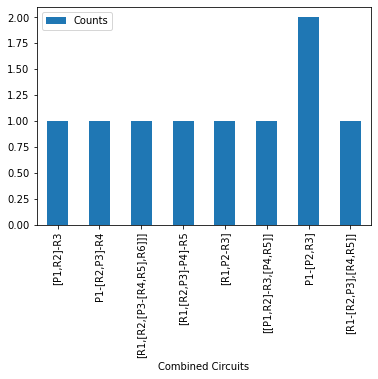

In [32]:
plt.figure(figsize=(10,5))
new_df.plot.bar(x="Combined Circuits",y="Counts")

### Quantify the complexity of each circuit

In [33]:
# calculate the numbers of each component and each symbols in the string
complexities = []

complexity_equs = []
complexity_numbers = []

complexity_components =[]
complexity_structures = []

complexity_ranks = []

for i in range(len(new_df['Combined Circuits'])):
    num_components = count_components(circuit = new_df['Combined Circuits'][i])

    complexity_component = np.sum(num_components[0][0:4])
    complexity_components.append(complexity_component)
    
    parallel_structures,lvl_counter_list = parallel_structure_identifior(input_circuit=new_df['Combined Circuits'][i],circuit_array=s_to_a_convert(new_df['Combined Circuits'][i]))
    complexity_structure = num_components[0][4]/2 + num_components[0][6] + np.sum(np.square(lvl_counter_list))
    complexity_structures.append(complexity_structure)
    
    complexity_equ = complexity_component - 1j*complexity_structure
    complexity_equs.append(complexity_equ)
    
    complexity_number = complexity_equ**2
    complexity_numbers.append(complexity_number)
    
    complexities.append([complexity_equ,complexity_number])
    
    complexity_rank = abs(complexity_number.real)
    complexity_ranks.append(complexity_rank)
    
new_df['Complexity'] = complexities

In [34]:
new_df

,Combined Circuits,Combined Values,Mathematical expressions,Counts,Complexity
0,"[P1,R2]-R3","[[P1w = 116.6632, P1n = 0.8429, R2 = 36.9393, ...",((X[0]*(2*π*F)**(-X[1])*(cos((π*X[1])*0.5)-sin...,1,"[(3-3j), -18j]"
1,"P1-[R2,P3]-R4","[[P1w = 4.3371, P1n = 0.275, R2 = 30.6672, P3w...",X[0]*(2*π*F)**(-X[1])*(cos((π*X[1])*0.5)-sin((...,1,"[(4-3j), (7-24j)]"
2,"[R1,[R2,[P3-[R4,R5],R6]]]","[[R1 = 7.39, R2 = 55.2413, P3w = 260.9053, P3n...",((X[0])^-1+(((X[1])^-1+(((X[2]*(2*π*F)**(-X[3]...,1,"[(6-24j), (-540-288j)]"
3,"[R1,[R2,P3]-P4]-R5","[[R1 = 35.9545, R2 = 1.0499, P3w = 59.9517, P3...",((X[0])^-1+(((X[1])^-1+(X[2]*(2*π*F)**(-X[3])*...,1,"[(5-8j), (-39-80j)]"
4,"[R1,P2-R3]","[[R1 = 55.2413, P2w = 260.9053, P2n = 0.8429, ...",((X[0])^-1+(X[1]*(2*π*F)**(-X[2])*(cos((π*X[2]...,1,"[(3-3j), -18j]"
5,"[[P1,R2]-R3,[P4,R5]]","[[P1w = 295.4727, P1n = 0.8753, R2 = 10.0, R3 ...",((((X[0]*(2*π*F)**(-X[1])*(cos((π*X[1])*0.5)-s...,1,"[(5-11j), (-96-110j)]"
6,"P1-[P2,R3]","[[P1n = 0.4029, P1w = 33.8628, P2n = 2.6748, P...",X[0]*(2*π*F)**(-X[1])*(cos((π*X[1])*0.5)-sin((...,2,"[(3-3j), -18j]"
7,"[R1-[R2,P3],[R4,R5]]","[[R1 = 27.3698, R2 = 7.5264, P3w = 260.9053, P...",((X[0]+((X[1])^-1+(X[2]*(2*π*F)**(-X[3])*(cos(...,1,"[(5-11j), (-96-110j)]"


In [255]:
# rank the circuits with their complexities from low to high
new_df['Complexity_sort'] = complexity_ranks
new_df.sort_values(['Complexity_sort'],ascending=True,inplace=True)
new_df.drop(['Complexity_sort'],axis=1,inplace=True)
new_df.reset_index(drop=True,inplace=True)
new_df

,Combined Circuits,Combined Values,Mathematical expressions,Counts,Complexity
0,"[P1,R2]-R3","[[P1w = 116.6632, P1n = 0.8429, R2 = 36.9393, ...",((X[0]*(2*π*F)**(-X[1])*(cos((π*X[1])*0.5)-sin...,1,"[(3-3j), -18j]"
1,"[R1,P2-R3]","[[R1 = 55.2413, P2w = 260.9053, P2n = 0.8429, ...",((X[0])^-1+(X[1]*(2*π*F)**(-X[2])*(cos((π*X[2]...,1,"[(3-3j), -18j]"
2,"P1-[P2,R3]","[[P1n = 0.4029, P1w = 33.8628, P2n = 2.6748, P...",X[0]*(2*π*F)**(-X[1])*(cos((π*X[1])*0.5)-sin((...,2,"[(3-3j), -18j]"
3,"[R1-L2,P3-R4]","[[R1 = 55.2583, L2 = 1.5522, P3w = 234.01, P3n...",((X[0]+(2*1j*π*F*X[1]))^-1+(X[2]*(2*π*F)**(-X[...,1,"[(4-3j), (7-24j)]"
4,"P1-[R2,P3]-R4","[[P1w = 4.3371, P1n = 0.275, R2 = 30.6672, P3w...",X[0]*(2*π*F)**(-X[1])*(cos((π*X[1])*0.5)-sin((...,1,"[(4-3j), (7-24j)]"
5,"[P1-P2,P3-L4]","[[P1w = 29.4624, P1n = 0.0073, P2w = 278.8481,...",((X[0]*(2*π*F)**(-X[1])*(cos((π*X[1])*0.5)-sin...,1,"[(4-3j), (7-24j)]"
6,"[L1-P2,R3-P4]","[[L1 = 3.9146, P2w = 54.0498, P2n = 0.0125, R3...",(((2*1j*π*F*X[0])+X[1]*(2*π*F)**(-X[2])*(cos((...,1,"[(4-3j), (7-24j)]"
7,"P1-L2-[P3,R4]","[[P1w = 19.1209, P1n = 0.0048, L2 = 5.7202, P3...",X[0]*(2*π*F)**(-X[1])*(cos((π*X[1])*0.5)-sin((...,1,"[(4-3j), (7-24j)]"
8,"[L1,R2]-R3-[R4,P5]","[[L1 = 1.9079, R2 = 3.3105, R3 = 18.3015, R4 =...",(((2*1j*π*F*X[0]))^-1+(X[1])^-1)^-1+X[2]+((X[3...,1,"[(5-6j), (-11-60j)]"
9,"L1-[R2,P3]-[P4-R5,P6-L7]","[[L1 = 4.8298, R2 = 10.0, P3w = 19.1428, P3n =...",(2*1j*π*F*X[0])+((X[1])^-1+(X[2]*(2*π*F)**(-X[...,1,"[(7-6j), (13-84j)]"


In [256]:
a = 'P1-[R2,C3]-R3-[R4,[P5-L6]]-R7'
b = '[R2,C3][R4,[P5-L6]]'

import difflib
d = difflib.Differ()
diff = d.compare(a.splitlines(),b.splitlines())
print('\n'.join(list(diff)))

- P1-[R2,C3]-R3-[R4,[P5-L6]]-R7
? ---       ----            ---

+ [R2,C3][R4,[P5-L6]]


In [217]:
new_df['Combined Values'][6]

[['R1 = 27.3698',
  'R2 = 7.5264',
  'P3w = 260.9053',
  'P3n = 0.8429',
  'R4 = 7.4016',
  'R5 = 55.2413']]

## Visualization

## Store the results as .json